<h1 style="color: #8b5e3c;">Bucks Model Development</h1>
Next, we will be working on developing a predictive model that helps assign each user account for one of tucket plans that the Miwaukee Bucks is interested in. We revisit the plans as follows:

- **Value Plan:** focuses on affordable tickets for weekday games
- **Marquee Opponent Plan:** featuring games against high-profile opponents
- **Weekend Plan:** highlighting weekend games for fans looking for weekend entertainment
- **Promotional Giveaway Inclusive Plan:** centered around games with promotional giveaways

<h2 style="color: #8b5e3c;">KMeans Clustering</h2>
We move to performing the KMeans Clustering. This will allow us to perform the clustering that will allow us to assign each of the clusters possibly to one of the plans.

In [1]:
# importing all the neceessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/GitHub/BucksHackathon25/BucksDatasets/ALGLSL_2023.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74770 entries, 0 to 74769
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           74770 non-null  int64  
 1   Unnamed: 0_x           74770 non-null  int64  
 2   Season_x               74770 non-null  int64  
 3   AccountNumber          74770 non-null  int64  
 4   Game                   74770 non-null  object 
 5   GameDate               74770 non-null  object 
 6   GameTier               74770 non-null  object 
 7   Unnamed: 0_y           74770 non-null  int64  
 8   Giveaway               20276 non-null  object 
 9   GiveawayLabel          74770 non-null  int64  
 10  Unnamed: 0             74770 non-null  int64  
 11  Season_y               74770 non-null  int64  
 12  SingleGameTickets      74770 non-null  int64  
 13  PartialPlanTickets     74770 non-null  int64  
 14  GroupTickets           74770 non-null  int64  
 15  ST

In [3]:
# retrieving the numerical and categorical features
numerical_features = ['BasketballPropensity', 'AvgSpend', 'GamesAttended', 'DistanceToArena']
categorical_features = ['STM', 'FanSegment', 'SocialMediaEngagement', 'GameTier', 'GiveawayLabel']

# applying the standard scaling and one hot encoding
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# performing PCA
X_preprocessed = preprocessor.fit_transform(df)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# using k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# retrieving cluster labels
df['Cluster'] = kmeans.labels_

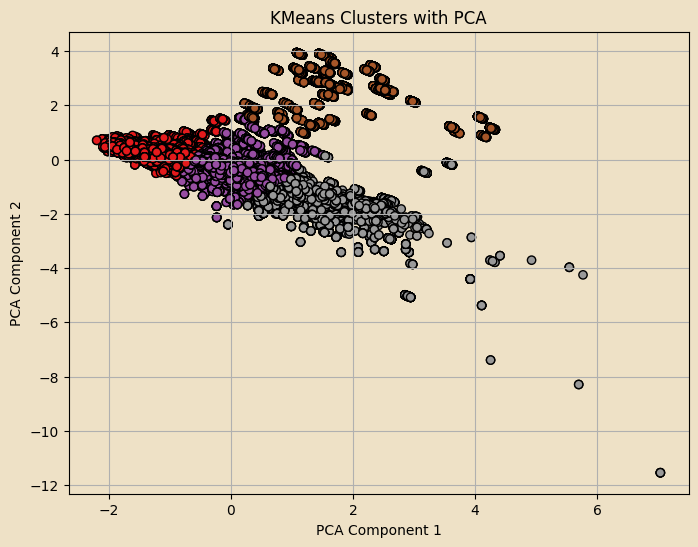

In [12]:
# importing seaborn library
import seaborn as sns

# plotting out the clustering
plt.figure(figsize=(8,6), facecolor='#EEE1C6')
ax = plt.gca()
ax.set_facecolor('#EEE1C6')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='Set1', edgecolor='k')
plt.title('KMeans Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [5]:
print("Explained variance by each component:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Explained variance by each component: [0.18827255 0.17225428]
Total variance explained: 0.3605268282444408


In [6]:
numerical_summary = df.groupby('Cluster').mean(numeric_only=True).round(2)
print("Numerical Summary by Cluster:")
print(numerical_summary)

Numerical Summary by Cluster:
         Unnamed: 0.1  Unnamed: 0_x  Season_x  AccountNumber  Unnamed: 0_y  \
Cluster                                                                      
0            38938.43      38938.42    2023.0        6479.62         19.48   
1            39188.20      39188.20    2023.0        6575.93         20.78   
2            23696.73      23696.73    2023.0        3126.72         20.43   
3            36840.28      36840.29    2023.0        6121.36         20.43   

         GiveawayLabel  Unnamed: 0  Season_y  SingleGameTickets  \
Cluster                                                           
0                 0.30     6478.62    2023.0               1.71   
1                 0.26     6574.93    2023.0               2.12   
2                 0.27     3125.72    2023.0               0.09   
3                 0.24     6120.36    2023.0             302.19   

         PartialPlanTickets  GroupTickets   STM  AvgSpend  GamesAttended  \
Cluster               

In [7]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nCategory distribution for {col} by Cluster:")
    summary = df.groupby('Cluster')[col].value_counts(normalize=True).unstack(fill_value=0).round(2)
    print(summary)


Category distribution for Game by Cluster:
Game     2023-10-26 Philadelphia 76ers  2023-10-29 Atlanta Hawks  \
Cluster                                                            
0                                 0.01                      0.03   
1                                 0.02                      0.02   
2                                 0.02                      0.02   
3                                 0.04                      0.02   

Game     2023-10-30 Miami Heat  2023-11-03 New York Knicks  \
Cluster                                                      
0                         0.03                        0.02   
1                         0.03                        0.02   
2                         0.02                        0.02   
3                         0.02                        0.02   

Game     2023-11-08 Detroit Pistons  2023-11-13 Chicago Bulls  \
Cluster                                                         
0                              0.03         

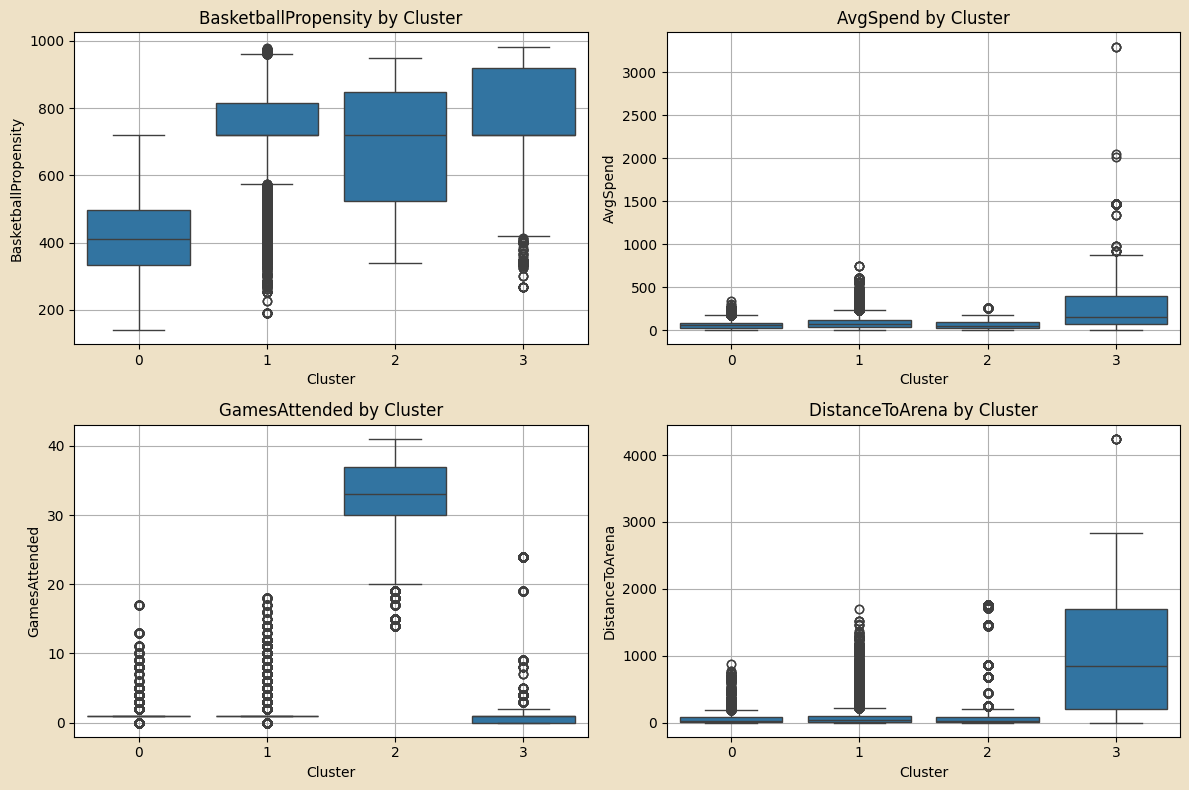

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['BasketballPropensity', 'AvgSpend', 'GamesAttended', 'DistanceToArena']

fig, axes = plt.subplots(2, 2, figsize=(12, 8), facecolor='#EEE1C6') 
ax = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=ax[i])
    ax[i].set_title(f'{feature} by Cluster')
    ax[i].set_xlabel('Cluster')
    ax[i].set_ylabel(feature)
    ax[i].grid(True)

plt.tight_layout()
plt.show()

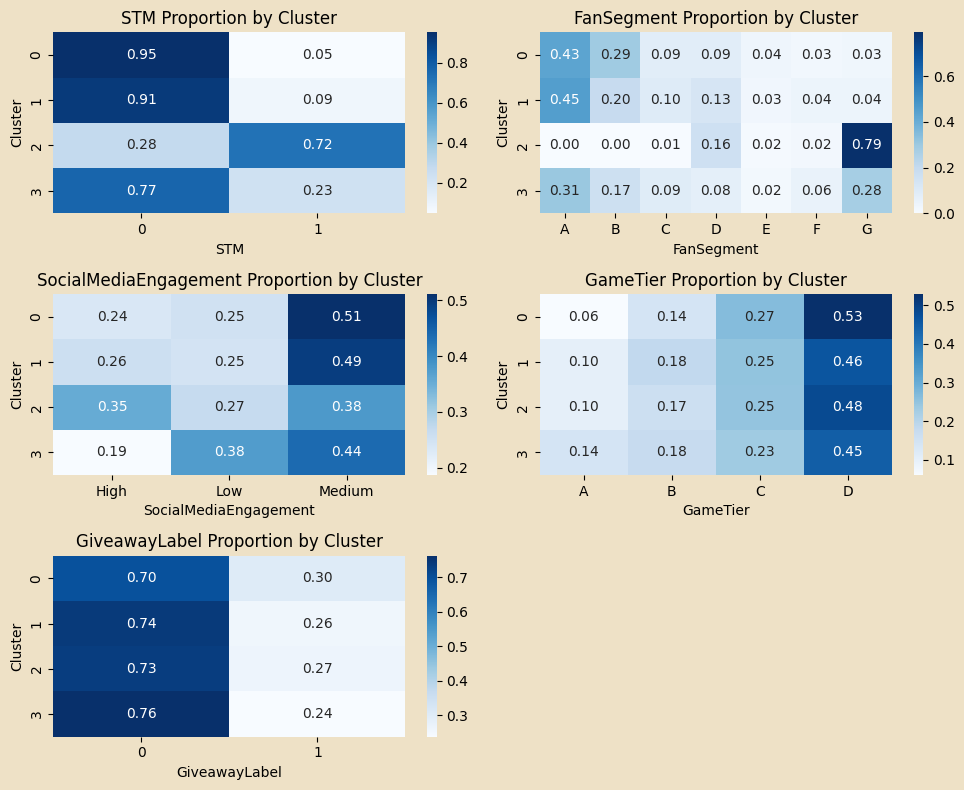

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8), facecolor='#EEE1C6') 
ax = axes.flatten()

for i, feature in enumerate(categorical_features):
    crosstab = pd.crosstab(df['Cluster'], df[feature], normalize='index')
    
    sns.heatmap(crosstab, annot=True, cmap='Blues', ax=ax[i], fmt=".2f")
    ax[i].set_title(f'{feature} Proportion by Cluster')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Cluster')

if len(categorical_features) < len(ax):
    for j in range(len(categorical_features), len(ax)):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


In [17]:
# saving the data frame as a .csv file
df.to_csv("C:/GitHub/BucksHackathon25/BucksDatasets/CustomerPlans_2023.csv")